In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing

## 1 Read in the Iris Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = iris.data

## 2 Find Centroids

In [5]:
# Use constant random_state
RANDOM_STATE = 213

### 2.1 When n_clusters == 3

In [6]:
kmeans_3 = KMeans(n_clusters = 3, random_state = RANDOM_STATE).fit(iris_data)
print(kmeans_3.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### 2.2 When n_clusters == 4

In [7]:
kmeans_4 = KMeans(n_clusters = 4, random_state = RANDOM_STATE).fit(iris_data)
print(kmeans_4.cluster_centers_)

[[6.23658537 2.85853659 4.80731707 1.62195122]
 [5.52962963 2.62222222 3.94074074 1.21851852]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]]


## 3 Visualise Clustering Result

In [8]:
# Define a plotting function for reuse

def visualise(kmeans, data):
    plt.figure(figsize=(6,5))
    
    plt.scatter(data[:,-2],
                data[:,-1],
                s = 50, c = kmeans.labels_, cmap = "rainbow") # iris data (last two columns)
    
    plt.scatter(kmeans.cluster_centers_[:, -2],  
                kmeans.cluster_centers_[:, -1], 
                marker = '*', 
                s = 150,
                color = 'blue', 
                label = 'Centers') # plot centers
    
    plt.legend(loc = 'best')
    plt.xlabel('X2') 
    plt.ylabel('X3')
    
    plt.show()

### 3.1 When n_clusters == 3

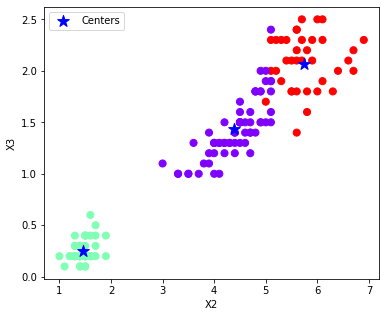

In [9]:
visualise(kmeans_3, iris_data)

### 3.2 When n_clusters == 4

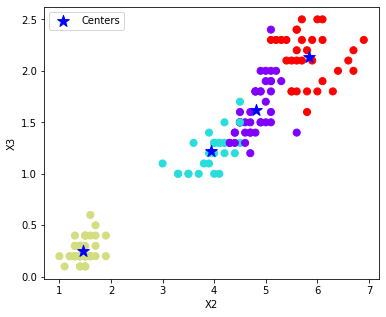

In [10]:
visualise(kmeans_4, iris_data)

## 4 K-Means with Normalised Data

In [11]:
# Normalise iris data

iris_data_normalised = preprocessing.normalize(iris_data)

# Generate K-Means models with normorlised data

kmeans_3_normalised = KMeans(n_clusters = 3, random_state = RANDOM_STATE).fit(iris_data_normalised)
kmeans_4_normalised = KMeans(n_clusters = 4, random_state = RANDOM_STATE).fit(iris_data_normalised)

### 4.1 Check centroids

In [12]:
print("For n_clusters=3:")
print(kmeans_3_normalised.cluster_centers_)

print("\n")

print("For n_clusters=4:")
print(kmeans_4_normalised.cluster_centers_)

For n_clusters=3:
[[0.80113979 0.5472692  0.23440877 0.03917808]
 [0.75290517 0.34920791 0.53149597 0.16393735]
 [0.70495129 0.32178747 0.59235975 0.21499323]]


For n_clusters=4:
[[0.75264296 0.35097959 0.53096549 0.16345989]
 [0.80113979 0.5472692  0.23440877 0.03917808]
 [0.69792651 0.33739007 0.58834889 0.22665026]
 [0.72176224 0.28874378 0.59819549 0.19071126]]


### 4.2 Visualisation

3 Clusters:



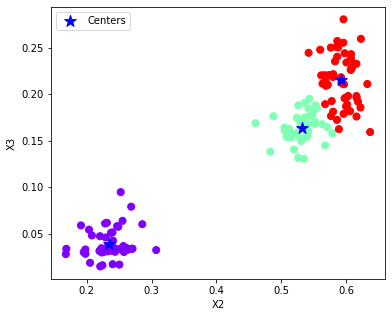

In [13]:
print("3 Clusters:\n")
visualise(kmeans_3_normalised, iris_data_normalised)

4 Clusters:



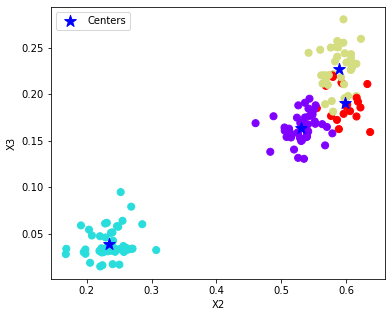

In [14]:
print("4 Clusters:\n")
visualise(kmeans_4_normalised, iris_data_normalised)